In [14]:
import glob
import re
import requests

import pandas as pd
from datasets import Dataset
from langchain_text_splitters import RecursiveCharacterTextSplitter

In [15]:
text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(
    model_name="gpt-2", chunk_size=300, chunk_overlap=100
)

In [16]:
subset_df = pd.read_csv('subset_dbnl.csv')
subset_df = subset_df[["titel","jaar","text_url"]]

In [17]:
subset_df

,titel,jaar,text_url
0,De tijrannijen der Franschen in de jaaren 1747...,1814,https://dbnl.org/nieuws/text.php?id=aa__002tijr01
1,"Nederlandsche bezittingen in Azia, Amerika en ...",1818,https://dbnl.org/nieuws/text.php?id=bosc036nede01
2,"Nieuwe Fransche tiranny, bijzonder onder de re...",1814,https://dbnl.org/nieuws/text.php?id=brin018nieu02
3,Vaderlandsche letteroefeningen. Jaargang 1805,1805,https://dbnl.org/nieuws/text.php?id=_vad003180501
4,Vaderlandsche letteroefeningen. Jaargang 1806,1806,https://dbnl.org/nieuws/text.php?id=_vad003180601
5,Vaderlandsche letteroefeningen. Jaargang 1807,1807,https://dbnl.org/nieuws/text.php?id=_vad003180701
6,Vaderlandsche letteroefeningen. Jaargang 1808,1808,https://dbnl.org/nieuws/text.php?id=_vad003180801
7,Vaderlandsche letteroefeningen. Jaargang 1809,1809,https://dbnl.org/nieuws/text.php?id=_vad003180901
8,Vaderlandsche letteroefeningen. Jaargang 1810,1810,https://dbnl.org/nieuws/text.php?id=_vad003181001
9,Vaderlandsche letteroefeningen. Jaargang 1811,1811,https://dbnl.org/nieuws/text.php?id=_vad003181101


In [18]:
texts = []
years = []
textnames = []

sub_patterns = [[r"{==.*==} {>>.*<<}",''], [r"[\n\t*]+",' '], [r' +',' ']]
for idx, row in subset_df.iterrows():
    print(f"On {row['titel']}")
    text = requests.get(row['text_url']).content.decode('utf-8')
    for pattern, sub in sub_patterns:
        text = re.sub(pattern, sub, text)
    split = text_splitter.split_text(text)
    texts.extend(split)
    years.extend([row['jaar']]*len(split))
    textnames.extend([row['titel']]*len(split))

On De tijrannijen der Franschen in de jaaren 1747, 1795-1813, in de Nederlanden gepleegd
On Nederlandsche bezittingen in Azia, Amerika en Afrika
On Nieuwe Fransche tiranny, bijzonder onder de regering van Napoleon Bonaparte
On Vaderlandsche letteroefeningen. Jaargang 1805
On Vaderlandsche letteroefeningen. Jaargang 1806
On Vaderlandsche letteroefeningen. Jaargang 1807
On Vaderlandsche letteroefeningen. Jaargang 1808
On Vaderlandsche letteroefeningen. Jaargang 1809
On Vaderlandsche letteroefeningen. Jaargang 1810
On Vaderlandsche letteroefeningen. Jaargang 1811
On Vaderlandsche letteroefeningen. Jaargang 1812
On Vaderlandsche letteroefeningen. Jaargang 1813
On Vaderlandsche letteroefeningen. Jaargang 1814
On Vaderlandsche letteroefeningen. Jaargang 1815
On Vaderlandsche letteroefeningen. Jaargang 1816
On Vaderlandsche letteroefeningen. Jaargang 1817
On Vaderlandsche letteroefeningen. Jaargang 1818
On Vaderlandsche letteroefeningen. Jaargang 1819


In [19]:
## OLD METHOD
# texts = []
# dates = []
# filenames = [] 
# # each year subset by <interp type="secundair" tag in xml
# for filepath in filepaths:
#     print(f"filepath: {filepath}")
#     with open(filepath, "r", encoding="utf-8") as f:
#         text = f.read()
#         year = re.findall(r"Jaargang 18[0-9]{2}", re.split(r"{==[0-9]+==} {>>pagina-aanduiding<<}", text)[0])
#         year = re.sub("[a-zA-Z]", "", year[0])
#         split = re.split(r"{==[0-9]+==} {>>pagina-aanduiding<<}", text)[1:]
#         split = [re.sub(r"{.*}", "", x) for x in split]
#         text = " ".join(split)
#         split = re.split(r"\n\n\n\n\n", text)
#         split = [re.sub(r"\n{1,}", "", x) for x in split]
#         texts.extend(split)
#         dates.extend([int(year)]*len(split))
#         filenames.extend([re.split(r"\\", filepath)[1]]*len(split))

In [20]:
len(textnames), len(years), len(texts)

(90725, 90725, 90725)

In [21]:
ds = Dataset.from_pandas(pd.DataFrame({"Year":years, "Text":texts, "Title": textnames}))

In [23]:
ds.save_to_disk("datasets_all/dbnl-subset")

Saving the dataset (0/1 shards):   0%|          | 0/90725 [00:00<?, ? examples/s]

In [24]:
ds = Dataset.load_from_disk("datasets_all/dbnl-subset")

In [25]:
df = ds.to_pandas()[['Year', 'Title']]

In [26]:
df['Title'] = [' '.join(x.split(' ')[:2]) for x in df['Title']]

<Axes: ylabel='Year'>

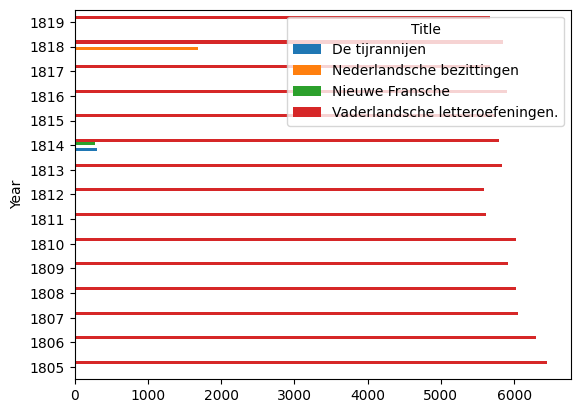

In [27]:
df.groupby(['Year', 'Title']).value_counts().unstack().plot.barh()